In [0]:
!pip install -U scikit-learn
!pip install -U numpy
!pip install -U pandas
!pip install -U scipy
!pip install --upgrade imbalanced-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.1)
    100% |████████████████████████████████| 13.9MB 2.7MB/s 
thinc 6.12.1 has requirement msgpack<0.6.0,>=0.5.6, but you'll have msgpack 0.6.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
    100% |████████████████████████████████| 8.9MB 3.3MB/s 
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.1.0)
Requirement already up-to-date: imbalanced-

#Α. Στοιχεία Ομάδας

### **Ομάδα Α46**

Μαρκουλέσκου Έλενα-Μπιάνκα  (03115126)

Παπασκαρλάτος Αλέξανδρος      (03111097)

#Β. Εισαγωγή Dataset

##Σύντομη περιγραφή

Το παρόν dataset έχει τίτλο [Polish companies bankruptcy data Data Set](http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data#) και αφορά την πρόβλεψη για χρεοκοπία πολωνικών εταιριών. Οι χρεοκοπημένες εταιρίες αναλύθηκαν για την περίοδο 2000-2012, ενώ αυτές που λειτουργούσαν ακόμα αξιολογήθηκαν για την περίοδο 2007-2013. 

Το dataset αποτελείται από 5 αρχεία. Το πρώτο αντιστοιχεί σε οικονομικά δεδομένα εταιρειών από την πρώτη χρονιά της περιόδου πρόβλεψης και και αντίστοιχο label που υποδεικνύει τη χρεοκοπία ή μη μετά από 5 χρόνια. Το δεύτερο περιέχει δεδομένα από τη δεύτερη χροονιά και υποδεικύει την κατάσταση χρεοκοπίας ή μη μετά από 4 χρόνια κ.ο.κ.

##Δείγματα, χαρακτηριστικά και κλάσεις
Για το καθένα από τα 5 αρχεία έχουμε:


* 1st Year: 7027 δείγματα, 271 χρεοκοπημένες εταιρίες,  6756 που δε χρεοκόπησαν
* 2nd Year: 10173 δείγματα, 400 χρεοκοπημένες εταιρίες,   9773 που δε χρεοκόπησαν
* 3rd Year: 10503 δείγματα, 495 χρεοκοπημένες εταιρίες,   10008 που δε χρεοκόπησαν
* 4th Year:  9792 δείγματα, 515 χρεοκοπημένες εταιρίες,   9277 που δε χρεοκόπησαν
* 5th Year: 5910 δείγματα, 410 χρεοκοπημένες εταιρίες,    5500 που δε χρεοκόπησαν

Αξίζει εδώ να παρατηρήσουμε πως ήδη μπορούμε να συμπεράνουμε ότι το dataset μας **δεν** είναι ισορροπημένο (θα το δούμε αυτό και στη συνέχεια).

Συνολικά, λοιπόν, έχουμε **43450 δείγματα**.

Η περιγραφή του dataset μας υποδεικύει πως έχουμε **64 χαρακτηριστικά**, τα είναι όλα αριθμητικά, συνεπώς **δεν έχουμε κατηγορικά χαρακτηριστικά**.

Οι **ετικέτες** των κλάσεων είναι **2** και αντιστοιχούν σε χρεοκοπία και όχι χρεοκοπία.

Παρακάτω εισάγουμε τα 5 αρχεία για να εξάγουμε περισσότερα συμπεράσματα.

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 1year.arff to 1year (1).arff


KeyboardInterrupt: ignored

In [0]:
!ls

'1year (1).arff'   2year.arff   4year.arff   sample_data
 1year.arff	   3year.arff   5year.arff   tmp


In [0]:
import pandas as pd
import numpy as np
from scipy.io import arff

In [0]:
data1 = arff.loadarff('1year.arff')
df1 = pd.DataFrame(data1[0])
data2 = arff.loadarff('2year.arff')
df2 = pd.DataFrame(data2[0])
data3 = arff.loadarff('3year.arff')
df3 = pd.DataFrame(data3[0])
data4 = arff.loadarff('4year.arff')
df4 = pd.DataFrame(data4[0])
data5 = arff.loadarff('5year.arff')
df5 = pd.DataFrame(data5[0])
print(df1.shape)
df1

(7027, 65)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.379510,0.396410,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.65800,4.41580,7.42770,b'0'
1,0.209120,0.499880,0.472250,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.35000,3.40000,60.98700,b'0'
2,0.248660,0.695920,0.267130,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.27000,2.71850,5.20780,b'0'
3,0.081483,0.307340,0.458790,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.43500,4.22280,5.54970,b'0'
4,0.187320,0.613230,0.229600,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.21000,2.86920,7.89800,b'0'
5,0.228220,0.497940,0.359690,1.75020,-47.7170,0.000000,0.281390,1.008300,1.97860,0.502060,...,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.44400,4.12690,12.29900,b'0'
6,0.111090,0.647440,0.289710,1.47050,2.5349,0.000000,0.111090,0.544540,1.73480,0.352560,...,0.605900,0.315100,0.40871,0.000000,6.3222,2.9098,129.55000,2.81730,18.35200,b'0'
7,0.532320,0.027059,0.705540,53.95400,299.5800,0.000000,0.652400,35.957000,0.65273,0.972940,...,0.086730,0.547130,0.49521,0.013194,9.1300,82.0500,7.45030,48.99100,2.32170,b'0'
8,0.009020,0.632020,0.053735,1.12630,-37.8420,0.000000,0.014434,0.582230,1.33320,0.367980,...,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.50000,3.13300,2.56030,b'0'
9,0.124080,0.838370,0.142040,1.16940,-91.8830,0.000000,0.153280,0.192790,2.11560,0.161630,...,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.63000,2.52360,107.67000,b'0'


Παρατηρούμε ότι τα δεδομένα μας **δεν έχουν αρίθμηση γραμμών ούτε επικεφαλίδες στην πρώτη γραμμή**. Άρα μπορούμε να τα ενώσουμε χωρίς να χρειαστεί να τα επεξεργαστούμε κάπως.

Τα **χαρακτηριστικά** βρίσκονται στις **64 πρώτες στήλες** και το **target στην τελευταία**.

In [0]:
dfs = [df1, df2, df3, df4, df5]

dataset = pd.concat(dfs)
print(dataset.shape)
dataset

(43405, 65)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.379510,0.396410,2.04720,3.235100e+01,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.6580,4.415800,7.42770,b'0'
1,0.209120,0.499880,0.472250,1.94470,1.478600e+01,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.3500,3.400000,60.98700,b'0'
2,0.248660,0.695920,0.267130,1.55480,-1.152300e+00,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.2700,2.718500,5.20780,b'0'
3,0.081483,0.307340,0.458790,2.49280,5.195200e+01,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.4350,4.222800,5.54970,b'0'
4,0.187320,0.613230,0.229600,1.40630,-7.312800e+00,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.2100,2.869200,7.89800,b'0'
5,0.228220,0.497940,0.359690,1.75020,-4.771700e+01,0.000000,0.281390,1.008300,1.97860,0.502060,...,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.4440,4.126900,12.29900,b'0'
6,0.111090,0.647440,0.289710,1.47050,2.534900e+00,0.000000,0.111090,0.544540,1.73480,0.352560,...,0.605900,0.315100,0.40871,0.000000,6.3222,2.9098,129.5500,2.817300,18.35200,b'0'
7,0.532320,0.027059,0.705540,53.95400,2.995800e+02,0.000000,0.652400,35.957000,0.65273,0.972940,...,0.086730,0.547130,0.49521,0.013194,9.1300,82.0500,7.4503,48.991000,2.32170,b'0'
8,0.009020,0.632020,0.053735,1.12630,-3.784200e+01,0.000000,0.014434,0.582230,1.33320,0.367980,...,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.5000,3.133000,2.56030,b'0'
9,0.124080,0.838370,0.142040,1.16940,-9.188300e+01,0.000000,0.153280,0.192790,2.11560,0.161630,...,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.6300,2.523600,107.67000,b'0'


##Απουσιάζουσες Τιμές

Ξέρουμε ήδη από την περιγραφή πως στο σύνολο δεδομένων μας υπάρχουν αποσιάζουσες τιμές. Παρακάτω εξετάζουμε πόσες είναι αυτές συνολικά αλλά και σε πόσες γραμμές (δείγματα) απουσιάζει τουλάχιστον ένα χαρακτηριστικό. 

In [0]:
summ = pd.isnull(dataset).sum().sum()
print("Total sum of missing values is: ", summ)

rows = dataset.isnull().any(axis=1).sum()
print("Number of rows with at least one missing value is: ", rows)

percentage = rows/len(dataset.index)
print("Percentage of missing values:", percentage)

Total sum of missing values is:  41322
Number of rows with at least one missing value is:  23438
Percentage of missing values: 0.5399838728257114


Παρατηρούμε ότι **σε παραπάνω από τα μισά δείγματά μας (54%) λείπει κάποιο χαρακτηριστικό**. Συνεπώς δε μπορούμε να διαγράψουμε τα δείγματα με απουσιάζουσες τιμές, αφού χάνουμε μεγάλο μέρος της πληροφορίας.

Αντί για αυτό, θα χρησιμοποιήσουμε τον Simple Imputer για να γεμίσουμε αυτά τα κενά με το **μέσο όρο** των τιμών που δεν απουσιάζουν, για κάθε χαρακτηριστικό. 

In [0]:
from sklearn.impute import SimpleImputer
data = dataset.values  #μετατροπή του dataframe σε numpy array
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(data)
imputed_data = imr.transform(data)
imputed_data

array([[ 2.0055e-01,  3.7951e-01,  3.9641e-01, ...,  4.4158e+00,
         7.4277e+00,  0.0000e+00],
       [ 2.0912e-01,  4.9988e-01,  4.7225e-01, ...,  3.4000e+00,
         6.0987e+01,  0.0000e+00],
       [ 2.4866e-01,  6.9592e-01,  2.6713e-01, ...,  2.7185e+00,
         5.2078e+00,  0.0000e+00],
       ...,
       [-1.7905e-01,  1.2553e+00, -2.7599e-01, ...,  1.7559e+00,
         9.9527e+00,  1.0000e+00],
       [-1.0886e-01,  7.4394e-01,  1.5449e-02, ...,  4.3911e+00,
         9.5575e-01,  1.0000e+00],
       [-1.0537e-01,  5.3629e-01, -4.5578e-02, ...,  2.6672e+00,
         2.7927e+00,  1.0000e+00]])

##Διαχωρισμός features, labels

Όπως αναφέραμε τα χαρατκηριστικά βρίσκονται στις πρώτες 64 στήλες και το target στην 65η (τελευταία) στήλη. 

Για λόγους συμβατότητας με τη scikit-learn, μετατρέπουμε τα features σε float και τα labels σε integer (εφαρμόζουμε και τη μέθοδο flatten έτσι ώστε τα ο πίινακας των labels να είναι μονοδιάστατος). 

In [0]:
features = imputed_data[:, :-1].astype(float)
labels = imputed_data[:, -1:].astype(int).flatten()
print(features)

print(labels)

[[ 2.0055e-01  3.7951e-01  3.9641e-01 ...  8.2658e+01  4.4158e+00
   7.4277e+00]
 [ 2.0912e-01  4.9988e-01  4.7225e-01 ...  1.0735e+02  3.4000e+00
   6.0987e+01]
 [ 2.4866e-01  6.9592e-01  2.6713e-01 ...  1.3427e+02  2.7185e+00
   5.2078e+00]
 ...
 [-1.7905e-01  1.2553e+00 -2.7599e-01 ...  2.0787e+02  1.7559e+00
   9.9527e+00]
 [-1.0886e-01  7.4394e-01  1.5449e-02 ...  8.3122e+01  4.3911e+00
   9.5575e-01]
 [-1.0537e-01  5.3629e-01 -4.5578e-02 ...  1.3685e+02  2.6672e+00
   2.7927e+00]]
[0 0 0 ... 1 1 1]


#Ισορροπία, διαχωρισμός σε train, test

In [0]:
print("frequencies:", np.bincount(labels))

frequencies: [41314  2091]


Βλέπουμε λοιπόν πως πράγματι το dataset μας **δεν** είναι ισορροπημένο. (Αξίζει εδώ να σημειώσουμε πως το label 0 αντιστοιχεί σε μη χρεοκοπημένη εταιρία, ενώ το label 1 αντιστοιχεί σε χρεοκοπία. Αυτό το αντιλαμβανόμαστε επειδή ξέρουμε από την περιγραφή πως οι χρεοκοπημένες εταιρίες είναι λιγότερες από τις μη χρεοκοπημένες.)

Η **κλάση 0** (μη χρεοκοπημένη εταιρία) αντιστοιχεί στο 41314/43450=0.951 ή **95%** του συνόλου, ενώ η **κλάση 1** (χρεοκοπία) μόλις στο 2091/43450=0.048 ή **0.05** επί του συνόλου.

Χωρίζουμε τα δεδομένα μας σε train και test με το test να αποτελεί το 30% του συνόλου.

In [0]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.30)

#Γ. Baseline Classifiaction

Παρακάτω θα εκπαιδεύσουμε τους Dummy Classifiers (για όλες τις στρατηγικές που έχουμε διδαχτεί στο εργαστήριο) καθώς και τους Gaussian Naive Bayes Classifier, KNeighbors Classifier και Multi Layer Perceptron με τις default τιμές τους. Δε θα κάνουμε ακόμα καμία προεπεξεργασία στα δεδομένα μας. Για τον καθένα θα εκτυπώσουμε το classification report (όπου φαίνονται οι μετρικές f1 marco average και f1 micro average) και τον πίνακα σύγχυσης. Τέλος, θα κρατήσουμε την κάθε averaged μετρική σε ένα dictionary για όλα τα μοντέλα, έτσι ώστε να μπορέσουμε να τις απεικονίσουμε με διαγράμματα και να συγκρίνουμε τις επιδόσεις των μοντέλων.

##Dummy Classifiers

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

uniform = DummyClassifier(strategy="uniform")
constant_0 = DummyClassifier(strategy="constant", constant=0)
constant_1 = DummyClassifier(strategy="constant", constant=1)
most_frequent = DummyClassifier(strategy="most_frequent")
stratified = DummyClassifier(strategy="stratified")

model = uniform.fit(train, train_labels)
model = constant_0.fit(train, train_labels)
model = constant_1.fit(train, train_labels)
model = most_frequent.fit(train, train_labels)
model = stratified.fit(train, train_labels)

f1_macro = {}
f1_micro = {}

print('Dummy Uniform:')
pred = uniform.predict(test)
f1_micro["Uniform"] = f1_score(test_labels, pred, average = 'micro')
f1_macro["Uniform"] = f1_score(test_labels, pred, average = 'macro')
print(confusion_matrix(test_labels, pred))
print(classification_report(test_labels, pred))

print('Dummy Constant 0:')
pred = constant_0.predict(test)
f1_micro["Constant 0"] = f1_score(test_labels, pred, average = 'micro')
f1_macro["Constant 0"] = f1_score(test_labels, pred, average = 'macro')
print(confusion_matrix(test_labels, pred))
print(classification_report(test_labels, pred))

print('Dummy Constant_1:')
pred = constant_1.predict(test)
f1_micro["Constant 1"] = f1_score(test_labels, pred, average = 'micro')
f1_macro["Constant 1"] = f1_score(test_labels, pred, average = 'macro')
print(confusion_matrix(test_labels, pred))
print(classification_report(test_labels, pred))

print('Dummy Most Frequent:')
pred = most_frequent.predict(test)
f1_micro["Most Frequent"] = f1_score(test_labels, pred, average = 'micro')
f1_macro["Most Frequent"] = f1_score(test_labels, pred, average = 'macro')
print(confusion_matrix(test_labels, pred))
print(classification_report(test_labels, pred))

print('Dummy Stratified:')
pred = stratified.predict(test)
f1_micro["Stratified"] = f1_score(test_labels, pred, average = 'micro')
f1_macro["Stratified"] = f1_score(test_labels, pred, average = 'macro')
print(confusion_matrix(test_labels, pred))
print(classification_report(test_labels, pred))

Dummy Uniform:
[[6191 6214]
 [ 305  312]]
              precision    recall  f1-score   support

           0       0.95      0.50      0.66     12405
           1       0.05      0.51      0.09       617

   micro avg       0.50      0.50      0.50     13022
   macro avg       0.50      0.50      0.37     13022
weighted avg       0.91      0.50      0.63     13022

Dummy Constant 0:
[[12405     0]
 [  617     0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     12405
           1       0.00      0.00      0.00       617

   micro avg       0.95      0.95      0.95     13022
   macro avg       0.48      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Dummy Constant_1:
[[    0 12405]
 [    0   617]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12405
           1       0.05      1.00      0.09       617

   micro avg       0.05      0.05      0.0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##Gaussian Naive Bayes Clasiffier

In [0]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train, train_labels)

pred = gnb.predict(test)
f1_micro["GNB"] = f1_score(test_labels, pred, average = 'micro')
f1_macro["GNB"] = f1_score(test_labels, pred, average = 'macro')
print("GNB:")
print(confusion_matrix(test_labels, pred))
print(classification_report(test_labels, pred))

GNB:
[[  270 12135]
 [   15   602]]
              precision    recall  f1-score   support

           0       0.95      0.02      0.04     12405
           1       0.05      0.98      0.09       617

   micro avg       0.07      0.07      0.07     13022
   macro avg       0.50      0.50      0.07     13022
weighted avg       0.90      0.07      0.04     13022



##KNeighbors Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train, train_labels)
pred = knn.predict(test)
f1_micro["KNN_default"] = f1_score(test_labels, pred, average = 'micro')
f1_macro["KNN_default"] = f1_score(test_labels, pred, average = 'macro')
print("KNN Default:")
print(confusion_matrix(test_labels, pred))
print(classification_report(test_labels, pred))

KNN Default:
[[12343    62]
 [  570    47]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     12405
           1       0.43      0.08      0.13       617

   micro avg       0.95      0.95      0.95     13022
   macro avg       0.69      0.54      0.55     13022
weighted avg       0.93      0.95      0.93     13022



##Multi Layer Perceptron

In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(train, train_labels)
pred = mlp.predict(test)
f1_micro["MLP_default"] = f1_score(test_labels, pred, average = 'micro')
f1_macro["MLP_default"] = f1_score(test_labels, pred, average = 'macro')
print("MLP Default:")
print(confusion_matrix(test_labels, pred))
print(classification_report(test_labels, pred))

MLP Default:
[[11604   801]
 [  419   198]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     12405
           1       0.20      0.32      0.25       617

   micro avg       0.91      0.91      0.91     13022
   macro avg       0.58      0.63      0.60     13022
weighted avg       0.93      0.91      0.92     13022



##Plots, Σχολιασμός

###f1_micro average bar plot

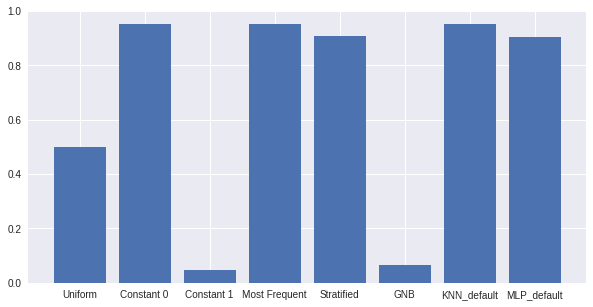

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10, 5))
plt.bar(range(len(f1_micro)), list(f1_micro.values()), align='center')
plt.xticks(range(len(f1_micro)), list(f1_micro.keys()))
plt.show()

###f1_macro average

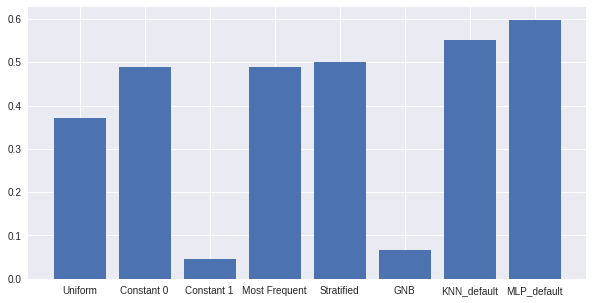

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10, 5))
plt.bar(range(len(f1_macro)), list(f1_macro.values()), align='center')
plt.xticks(range(len(f1_macro)), list(f1_macro.keys()))
plt.show()

##Σχολιασμός
Παρατηρούμε από τα διαγράμματα πως καλύτερο f1 micro average έχουμε για τον Constant 0 (λογικό, αφού η συντριπική πλειοψηφία των δεγμάτων μας ανήκουν σε αυτή την κλάση), ενώ για τη μετρική f1 macro average καλύτερα τα πάει ο KNeighbors Classifier.

Για το micro average έχουμε πολύ υψηλές τιμές για όλους σχεδόν τους ταξινομητές άρα συμπεραίνουμε πως έχουμε να κάνουμε με ένα εύκολο dataset.

#Δ. Βελτιστοποίηση Ταξινομητών

Για καθέναν από τους Classifiers θα προσπαθήσουμε να βρούμε τη βέλτιστη αρχιτεκτονική. Για το λόγο αυτό θα χρειαστεί να κάνουμε την κατάλληλη προεπεξεργασία στα δεδομένα μας.

Αρχικά θα κάνουμε **επιλογή χαρακτηριστικών** στο train set με βάση τη διακύμανση των τιμών τους. Στη συνέχεια θα **κανονικοποιήσουμε** και θα **εξισορροπήσουμε** τα δεδομένα έτσι ώστε να έχουμε ίσο αριθμό δειγμάτων για κάθε κλάση. Το επόμενο βήμα είναι να κάνουμε **εξαγωγή νέων χαρακτηριστικών με ανάλυση σε κύριες συνιστώσες**. Τέλος θα δοκιμάσουμε τον **ταξινομητή** μας για τις διάφορες υπερπαραμέτρους του.

##Random Sampling

Επειδή το dataset μας είναι πολύ μεγάλο θα επιλέξουμε **τυχαία 1000 δείγματα** έτσι ώστε να κάνουμε Gridsearch με βάση αυτά.
Μόλις βρούμε τη βέλτιστη αρχιτεκτονική για την κάθε μετρική για αυτά τα 1000 δείγματα και κάνουμε ένα **πιο στενό GriSearch  σε όλο το training set**. Την πλέον βέλτιστη αρχιτεκτονική θα την εφαρμόσουμε για να κάνουμε fit σε **ολόκληρο** το training set και predict στο test set. 

In [0]:
from sklearn.utils import shuffle
sdata, starget = shuffle(features, labels)
samples = 1000
sfeatures = sdata[0:samples-1,:]
slabels = starget[0:samples-1]

In [0]:
#Χωρίζουμε ξανά τα 1000 samples αυτή τη φορά σε train και test set
strain, stest, strain_labels, stest_labels = train_test_split(sfeatures, slabels, test_size=0.30)


##Variance Threshold

Θα βρούμε τα min, max της απόκλισης του κάθε χαρακτηριστικού του train set για να προσαρμόσουμε το threshold ανάλογα

In [0]:
variance = strain.var(axis=0)
print(variance)
print(np.max(variance))
print(np.min(variance))

#Τα παρπακάτω μας χρειάζονται για να προσδιορίσουμε το threshold του selector στην περίπτωση που χρησιμοποιήσουμε min-max scaler για το grid search

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
variance = np.var(train_scaled, axis=0)

maxx = max(variance)
print("Max scaled variance is ", maxx)

minn  = min(variance)
print("Min scaled variance is ", minn)



[8.59830975e+00 1.78516019e+01 1.77401074e+01 9.13823970e+02
 1.86473219e+08 3.59637028e+00 8.60670450e+00 2.41519067e+03
 1.07061731e+02 1.78432213e+01 6.65751556e+00 5.08448377e+00
 6.10532690e-01 8.60670450e+00 3.54556969e+09 4.07348141e+00
 2.41569946e+03 8.60670450e+00 5.87684755e-01 2.95784778e+03
 1.11680109e+00 6.64641476e+00 5.60048797e-01 8.31749443e+00
 2.29652329e+01 3.50199440e+00 1.03269420e+08 6.29894755e+02
 7.03042597e-01 9.59497702e+00 6.04587199e-01 1.44718240e+08
 9.66509497e+01 5.46384192e+01 5.85958539e+00 1.07579706e+02
 5.20758553e+04 1.78549672e+01 7.98927738e-02 2.75005720e+02
 9.91745235e+01 1.76938892e-01 3.04666384e+04 2.81837204e+04
 1.20284480e+06 9.09707290e+02 6.11877349e+03 7.87011174e+00
 2.99880674e-01 4.24640377e+02 1.78698149e+01 1.08663037e+03
 6.29243422e+02 6.29653209e+02 2.87740464e+10 1.04138522e-01
 1.34331973e+01 1.12107626e-01 2.15980416e+00 1.29651001e+08
 2.93472337e+04 1.45923784e+05 1.51360987e+02 1.20576356e+04]
28774046353.680256
0.07

##GridSearch

Για το Cross Validation χρησιμοποιούμε 5 folds

##GNB

Θα κάνουμε top down ανάλυση, ξεκινώτας με όλα τα στάδια και αφαιρώντας κάθε φορά ένα, μέχρι να αφήσουμε μόνο τον ταξινομητή.

In [0]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

vthreshold = [0, 300, 30000, 300000]
n_components = [3,5,7]

selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler() #για αυτό το dataset θα χρησιμοποιήσουμε μόνο τον RandomOverSampler 
                          #και όχι τον UnderSampler γιατί εφόσον η μια κλάση μας συναντάται στο 0.05%
                          #των δειγμάτων, αν κάνουμε UnderSampling θα χάσουμε πολλά δείγματα, άρα και
                          #πολλή πληροφορία
pca = PCA()
gnb = GaussianNB()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('ros', ros), ('pca', pca), ('gnb', gnb)])
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)

estimator.fit(strain, strain_labels)
preds = estimator.predict(stest)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
print(estimator.best_estimator_)
print(estimator.best_params_)
print("Best score: ", f1_score(stest_labels, preds, average = 'macro'))

Pipeline(memory=None,
     steps=[('selector', VarianceThreshold(threshold=300)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))])
{'pca__n_components': 3, 'selector__threshold': 300}
Best score:  0.33205183167152996


##f1_micro average

####Στάδια
1. Variance Threshold
2. StandardScaler
3. RandomOverSampler
4. PCA
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: **0.9166666666666666**

{'pca__n_components': 3, 'selector__threshold': 0}

---
####Στάδια
1. Variance Threshold
2. StandardScaler
3. RandomOverSampler
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.8733333333333333

{ 'selector__threshold': 0}

---
####Στάδια
1. Variance Threshold
2. StandardScaler
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.89

{'selector__threshold': 0}

---
####Στάδια
1. Variance Threshold
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.5666666666666667

{'selector__threshold': 0}

---
Εδώ δε θα πάρουμε την περίπτωση του να έχουμε μόνο τον ταξινομητή, αφού αυτός δεν έχει παραμέτρους που χρειάζονται βελτιστοποίηση .

---
---
Θα δούμε τώρα τι γίνεται σε περίπτωση που χρησιμοποιήσουμε MinMaxScaler


####Στάδια
1. Variance Threshold
2. StandardScaler
3. RandomOverSampler
4.PCA
5.GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.91

{'pca__n_components': 3, 'selector__threshold': 0.0001}

---
####Στάδια
1. MinMaxScaler
1. Variance Threshold
3. RandomOverSampler
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.88

{'selector__threshold': 0.001}

---
####Στάδια
1. MinMaxScaler
1. Variance Threshold
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.89

{'selector__threshold': 0}

---
####Στάδια
1. MinMaxScaler
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.89

##Βέλτιστη Αρχιτεκτονική
##Optimized GridSearch

####Στάδια
1. Variance Threshold
2. StandardScaler
3. RandomOverSampler
4. PCA
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.9166666666666666

{'pca__n_components': 3, 'selector__threshold': 0}

In [0]:
vthreshold = [0, 0.0001, 0.01, 1]
n_components = [1,2,3,4]

selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
gnb = GaussianNB()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('ros', ros), ('pca', pca), ('gnb', gnb)])
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)

import time
start_time = time.time()
times_micro = {}

estimator.fit(train, train_labels)
preds = estimator.predict(test)

end_time = time.time()



In [0]:
times_micro["Optimized GNB"] = end_time-start_time
print("Συνολικός χρόνος fit και predict: %s seconds\n" %(end_time-start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)

print("\n Optimized GNB:")
print(confusion_matrix(test_labels, preds))
print(classification_report(test_labels, preds))

f1_micro_opt={}
f1_micro_opt["GNB_optimized"] = f1_score(test_labels, preds, average = 'micro')

metavoli = {}
metavoli['GNB'] = f1_micro_opt['GNB_optimized'] - f1_micro['GNB']

best_n = estimator.best_params_['pca__n_components']
best_thr = estimator.best_params_['selector__threshold']

Συνολικός χρόνος fit και predict: 50.00786256790161 seconds

Pipeline(memory=None,
     steps=[('selector', VarianceThreshold(threshold=0.0001)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))])
{'pca__n_components': 1, 'selector__threshold': 0.0001}

 Optimized GNB:
[[12385    20]
 [  613     4]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     12405
           1       0.17      0.01      0.01       617

   micro avg       0.95      0.95      0.95     13022
   macro avg       0.56      0.50      0.49     13022
weighted avg       0.92      0.95      0.93     13022



Όπως παρατηρούμε παρακάτω, με 1 μόνο n_component εξηγούμε το 60.8% της διακύμανσης του dataset.

[0.60806761 0.72492757 0.83467708 0.8925854  0.93664769 0.97106003
 0.98460409 0.99635576 0.99929347 0.99974854 0.99984454 0.99990659
 0.99995457 0.99997726 0.99998485 0.99998851 0.9999919  0.99999457
 0.99999615 0.99999738 0.99999811 0.99999864 0.99999913 0.99999931
 0.99999949 0.99999962 0.99999973 0.9999998  0.99999987 0.99999991
 0.99999994 0.99999996 0.99999997 0.99999998 0.99999999 0.99999999
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


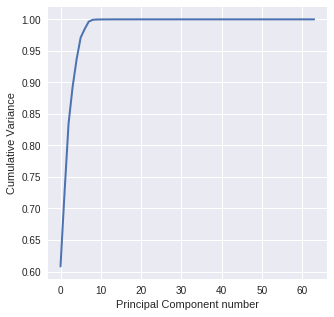

In [0]:
kpca_transform = pca.fit_transform(features)
explained_variance = np.var(kpca_transform, axis=0)
evar = explained_variance / np.sum(explained_variance)

#evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

Θα εφαρμόσουμε την αρχιτεκτονική που βρήκαμε για να κάνουμε fit στους Dummy Classifiers έτσι ώστε να συγκρίνουμε τα αποτελέσματά μας.

In [0]:
selector = VarianceThreshold(best_thr)
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA(best_n)
gnb = GaussianNB()

train_reduced = selector.fit_transform(train)
test_reduced = selector.transform(test)

train_scaled = scaler.fit_transform(train_reduced)
test_scaled = scaler.transform(test_reduced)

train_resampled, train_labels_resampled = ros.fit_sample(train_scaled, train_labels)

train_pca = pca.fit_transform(train_resampled)
test_pca = pca.transform(test_scaled)

In [0]:
uniform = DummyClassifier(strategy="uniform")
constant_0 = DummyClassifier(strategy="constant", constant=0)
constant_1 = DummyClassifier(strategy="constant", constant=1)
most_frequent = DummyClassifier(strategy="most_frequent")
stratified = DummyClassifier(strategy="stratified")

uniform.fit(train_pca, train_labels_resampled)
constant_0.fit(train_pca, train_labels_resampled)
constant_1.fit(train_pca, train_labels_resampled)
most_frequent.fit(train_pca, train_labels_resampled)
stratified.fit(train_pca, train_labels_resampled)


#print('Dummy Uniform:')
pred = uniform.predict(test_pca)
f1_micro_opt["Uniform"] = f1_score(test_labels, pred, average = 'micro')
metavoli["Uniform"] = f1_micro_opt["Uniform"] - f1_micro["Uniform"]

#print('Dummy Constant 0:')
pred = constant_0.predict(test_pca)
f1_micro_opt["Constant 0"] = f1_score(test_labels, pred, average = 'micro')
metavoli["Constant 0"] = f1_micro_opt["Constant 0"] - f1_micro["Constant 0"]

#print('Dummy Constant_1:')
pred = constant_1.predict(test_pca)
f1_micro_opt["Constant 1"] = f1_score(test_labels, pred, average = 'micro')
metavoli["Constant 1"] = f1_micro_opt["Constant 1"] - f1_micro["Constant 1"]

#print('Dummy Most Frequent:')
pred = most_frequent.predict(test_pca)
f1_micro_opt["Most Frequent"] = f1_score(test_labels, pred, average = 'micro')
metavoli["Most Frequent"] = f1_micro_opt["Most Frequent"] - f1_micro["Most Frequent"]

#print('Dummy Stratified:')
pred = stratified.predict(test)
f1_micro_opt["Stratified"] = f1_score(test_labels, pred, average = 'micro')
metavoli["Stratified"] = f1_micro_opt["Stratified"] - f1_micro["Stratified"]

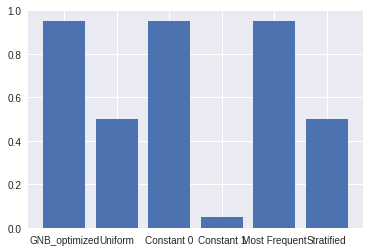

In [0]:
plt.bar(range(len(f1_micro_opt)), list(f1_micro_opt.values()), align='center')
plt.xticks(range(len(f1_micro_opt)), list(f1_micro_opt.keys()))
plt.show()

In [0]:
for header in metavoli.keys():
  print(header, metavoli[header])

GNB 0.8844263553985563
Uniform 0.0018430348640761096
Constant 0 0.0
Constant 1 0.0
Most Frequent 0.0
Stratified -0.4065427737674705


###f1_marco average

####Στάδια
1. Variance Threshold
2. StandardScaler
3. RandomOverSampler
4. PCA
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.5152220283110336

{'pca__n_components': 3, 'selector__threshold': 0}

---
####Στάδια
1. Variance Threshold
2. StandardScaler
3. RandomOverSampler
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.49594354567711585

{ 'selector__threshold': 0}

--- 
####Στάδια
1. Variance Threshold
2. StandardScaler
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.4993678887484197

{'selector__threshold': 0}

---

####Στάδια
1. Variance Threshold
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.36868686868686873

{'selector__threshold': 0}


---
---

Θα δούμε τώρα τι συμβαίνει αν χρησιμοποιήσουμε MinMaxScaler

####Στάδια
1. MinMaxScaler
1. Variance Threshold
3. RandomOverSampler
4. PCA
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: **0.5670995670995671**

{'pca__n_components': 3, 'selector__threshold': 0}

---
####Στάδια
1. MinMaxScaler
1. Variance Threshold
3. RandomOverSampler
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.49594354567711585

{ 'selector__threshold': 0.0001}

--- 
####Στάδια
1. MinMaxScaler
1. Variance Threshold
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.4993678887484197

{'selector__threshold': 0}

---

####Στάδια
1. MinMaxScaler
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: 0.4993678887484197

##Βέλτιστη Αρχιτεκτονική
####Στάδια
1. MinMaxScaler
1. Variance Threshold
3. RandomOverSampler
4. PCA
5. GNB

###Βέλτιστη επίδοση, παράμετροι
Επίδοση: **0.5670995670995671**

{'pca__n_components': 3, 'selector__threshold': 0}

In [0]:
#Progressive GridSearch για ακόμα καλύτερες επιδόσεις

vthreshold = [0, 0.000001, 0.00001]
n_components = [1,2,3,4]

selector = VarianceThreshold()
scaler = MinMaxScaler()
ros = RandomOverSampler()
pca = PCA()
gnb = GaussianNB()

pipe = Pipeline(steps=[('scaler', scaler), ('selector', selector), ('ros', ros), ('pca', pca), ('gnb', gnb)])
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)

import time
start_time = time.time()
times_macro= {}

estimator.fit(train, train_labels)
preds = estimator.predict(test)

end_time = time.time()

In [0]:
times_macro["Optimized GNB"] = end_time-start_time
print("Συνολικός χρόνος fit και predict: %s seconds\n" %(end_time-start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)

print("\n Optimized GNB:")
print(confusion_matrix(test_labels, preds))
print(classification_report(test_labels, preds))

f1_macro_opt={}
f1_macro_opt["GNB_optimized"] = f1_score(test_labels, preds, average = 'macro')

metavoli = {}
metavoli['GNB'] = f1_micro_opt['GNB_optimized'] - f1_micro['GNB']

best_n = estimator.best_params_['pca__n_components']
best_thr = estimator.best_params_['selector__threshold']

Συνολικός χρόνος fit και predict: 37.076473236083984 seconds

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=1e-06)), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))])
{'pca__n_components': 2, 'selector__threshold': 1e-06}

 Optimized GNB:
[[12199   206]
 [  596    21]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12405
           1       0.09      0.03      0.05       617

   micro avg       0.94      0.94      0.94     13022
   macro avg       0.52      0.51      0.51     13022
weighted avg       0.91      0.94      0.92     13022



In [0]:
selector = VarianceThreshold(best_thr)
scaler = MinMaxScaler()
ros = RandomOverSampler()
pca = PCA(best_n)
gnb = GaussianNB()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

train_reduced = selector.fit_transform(train_scaled)
test_reduced = selector.transform(test_scaled)

train_resampled, train_labels_resampled = ros.fit_sample(train_reduced, train_labels)

train_pca = pca.fit_transform(train_resampled)
test_pca = pca.transform(test_reduced)

In [0]:
uniform = DummyClassifier(strategy="uniform")
constant_0 = DummyClassifier(strategy="constant", constant=0)
constant_1 = DummyClassifier(strategy="constant", constant=1)
most_frequent = DummyClassifier(strategy="most_frequent")
stratified = DummyClassifier(strategy="stratified")

uniform.fit(train_pca, train_labels_resampled)
constant_0.fit(train_pca, train_labels_resampled)
constant_1.fit(train_pca, train_labels_resampled)
most_frequent.fit(train_pca, train_labels_resampled)
stratified.fit(train_pca, train_labels_resampled)


#print('Dummy Uniform:')
pred = uniform.predict(test_pca)
f1_macro_opt["Uniform"] = f1_score(test_labels, pred, average = 'macro')
metavoli["Uniform"] = f1_macro_opt["Uniform"] - f1_macro["Uniform"]

#print('Dummy Constant 0:')
pred = constant_0.predict(test_pca)
f1_macro_opt["Constant 0"] = f1_score(test_labels, pred, average = 'macro')
metavoli["Constant 0"] = f1_macro_opt["Constant 0"] - f1_micro["Constant 0"]

#print('Dummy Constant_1:')
pred = constant_1.predict(test_pca)
f1_macro_opt["Constant 1"] = f1_score(test_labels, pred, average = 'macro')
metavoli["Constant 1"] = f1_macro_opt["Constant 1"] - f1_micro["Constant 1"]

#print('Dummy Most Frequent:')
pred = most_frequent.predict(test_pca)
f1_macro_opt["Most Frequent"] = f1_score(test_labels, pred, average = 'macro')
metavoli["Most Frequent"] = f1_macro_opt["Most Frequent"] - f1_micro["Most Frequent"]

#print('Dummy Stratified:')
pred = stratified.predict(test)
f1_macro_opt["Stratified"] = f1_score(test_labels, pred, average = 'macro')
metavoli["Stratified"] = f1_macro_opt["Stratified"] - f1_micro["Stratified"]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


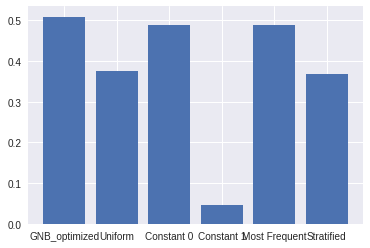

In [0]:
plt.bar(range(len(f1_macro_opt)), list(f1_macro_opt.values()), align='center')
plt.xticks(range(len(f1_macro_opt)), list(f1_macro_opt.keys()))
plt.show()

In [0]:
for header in metavoli.keys():
  print(header, metavoli[header])

GNB 0.8844263553985563
Uniform 0.004299229544804939
Constant 0 -0.46475141761934546
Constant 1 -0.0021434339619543705
Most Frequent -0.46475141761934546
Stratified -0.5402974701814941


##Σχολιασμός

Παρατηρούμε πως οι βελτιστοποιημένοι ταξινομητές έχουν τεράστιες μεταβολές στην επίδοση και για τις 2 μετρικές που χρησιμοποιήσαμε. Ακόμα, έχουν την καλύτερη επίδοση από όλους τους default, συνεπώς το μοντέλο μας βελτιστοποιήθηκε στο σύνολο.

Οι μεταβολές στους Dummys οφείλονται κυρίως στην τύχη αφού αυτοί επιλέγουν τυχαία μια κλάση και για το λόγο αυτό *δε θα ξανακάνουμε fit* σε αυτούς για τα επόμενα μοντέλα.

##Knn Neighbors

In [0]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει transform() kai όχι ως scale()
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from statistics import mean
import time


## Βελτιστοποίηση του kNN ως προς το f1_micro

In [0]:
#Δοκιμάσαμε κάθε εφικτό συνδυασμό για την αρχιτεκτονική. Χρειαστήκαμε και αρκετό trial and error για να βρούμε καλά εύρη και διαβαθμίσεις
#Τα αποτελέσματα βρίσκονται στο markdown που ακολουθεί

n_components = [5,9]
vthreshold = [0,100,1000,10000]
scaler = StandardScaler()
ros = RandomOverSampler()

neighbors = [1,5,9,19]
metrics = ['minkowski','euclidean','manhattan','chebyshev']   
weights = ['uniform','distance']

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros),('pca', pca),('knn', knn)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=neighbors, knn__weights=weights, knn__metric=metrics), cv=5, scoring='f1_micro', n_jobs=-1)

import time
start_time = time.time()
estimator.fit(strain, strain_labels)
preds = estimator.predict(stest)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(stest_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

Συνολικός χρόνος fit και predict: 27.269882917404175 seconds
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       290
           1       0.00      0.00      0.00        10

   micro avg       0.94      0.94      0.94       300
   macro avg       0.48      0.49      0.48       300
weighted avg       0.93      0.94      0.94       300

Best score:  0.9298998569384835
Best estimator:  Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=10000)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_compo...ki',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'))])
Best parameters:  {'knn__metric': 'minkowski', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 9, 'selector

###Στάδια:
1. KNeighbors Classifier

###Επίδοση, βέλτιστη παράμετρος:
Best f1_micro score is  0.9483793517406963

Optimized params are: 

>neighbours = 13

>metric = minkowski

>weights = uniform

---
###Στάδια: 
1.  Variance Threshold
2. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.9483793517406963

Optimized params are: 

>threshold = 0

>neighbours = 13

>metric = minkowski

>weights = uniform

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.9359743897559024

Optimized params are: 

>threshold = 100

>neighbours = 1

>metric = minkowski

>weights = uniform

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is** 0.9515806322529011**

Optimized params are: 

>threshold = 100

>neighbours = 5

>metric = minkowski

>weights = uniform

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
4. PCA
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.9298998569384835

Optimized params are: 

>threshold = 10000

>n_componenents = 9

>neighbours = 1

>metric = minkowski

>weights = uniform

---


---
---
###Θα χρησιμοποιήσουμε τώρα Min-max Scaler αντί για Standard Scaler

###Στάδια:
1. MinMax Scaler
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.9487795118047219

Optimized params are: 


>neighbours = 9

>metric = manhattan

>weights = uniform

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.9487795118047219

Optimized params are: 


>threshold = 0

>neighbours = 9

>metric = manhattan

>weights = uniform

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is 0.9287715086034414

Optimized params are:


>threshold = 0

>neighbours = 1

>metric = manhattan

>weights = uniform

---

###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
4. PCA
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.9195839167833567

Optimized params are: 


>threshold = 0

>n_componenents = 9

>neighbours = 1

>metric = minkowski

>weights = uniform

---
---

In [0]:
#Optimized micro

vthreshold = [50,100,150]
scaler = StandardScaler()
ros = RandomOverSampler()

neighbors = [3,5,7] 
metrics = ['minkowski']   
weights = ['uniform']

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('knn', knn)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, knn__n_neighbors=neighbors, knn__weights=weights, knn__metric=metrics), cv=5, scoring='f1_micro', n_jobs=-1)

import time
start_time = time.time()
estimator.fit(strain, strain_labels)
preds = estimator.predict(stest)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(stest_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

Συνολικός χρόνος fit και predict: 1.4686989784240723 seconds
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       290
           1       0.15      0.30      0.20        10

   micro avg       0.92      0.92      0.92       300
   macro avg       0.56      0.62      0.58       300
weighted avg       0.95      0.92      0.93       300

Best score:  0.8912732474964234
Best estimator:  Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=50)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))])
Best parameters:  {'knn__metric': 'minkowski', 'knn__n_neighbors': 3, 'knn__weights': 'uniform', 'selector__thres

In [0]:
#Optimized, fit and test whole set

vthreshold = [50]
scaler = StandardScaler()
ros = RandomOverSampler()

neighbors = [3] 
metrics = ['minkowski']   
weights = ['uniform']

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('knn', knn)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, knn__n_neighbors=neighbors, knn__weights=weights, knn__metric=metrics), cv=5, scoring='f1_micro', n_jobs=-1)

import time
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
end_time=time.time()
print(classification_report(test_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

Συνολικός χρόνος fit και predict: 201.40760612487793 seconds
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     12405
           1       0.22      0.35      0.27       617

   micro avg       0.91      0.91      0.91     13022
   macro avg       0.59      0.64      0.61     13022
weighted avg       0.93      0.91      0.92     13022

Best score:  0.9086331172036994
Best estimator:  Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=50)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))])
Best parameters:  {'knn__metric': 'minkowski', 'knn__n_neighbors': 3, 'knn__weights': 'uniform', 'selector__thres

In [0]:
#times_micro["Optimized kNN"] = end_time-start_time
#print("Συνολικός χρόνος fit και predict: %s seconds\n" %(end_time-start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)

print("\n Optimized kNN:")
print(confusion_matrix(test_labels, preds))
print(classification_report(test_labels, preds))

f1_micro_opt["kNN_optimized"] = f1_score(test_labels, preds, average = 'micro')

f1_micro_opt["kNN_optimized"] = f1_score(test_labels, preds, average = 'micro')
metavoli['kNN'] = f1_micro_opt['kNN_optimized'] - f1_micro['KNN_default']

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=50)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))])
{'knn__metric': 'minkowski', 'knn__n_neighbors': 3, 'knn__weights': 'uniform', 'selector__threshold': 50}

 Optimized kNN:
[[11641   764]
 [  401   216]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     12405
           1       0.22      0.35      0.27       617

   micro avg       0.91      0.91      0.91     13022
   macro avg       0.59      0.64      0.61     13022
weighted avg       0.93      0.91      0.92     13022



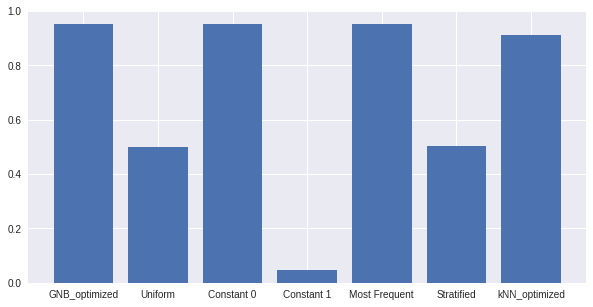

In [0]:
plt.figure(1, figsize=(10, 5))
plt.bar(range(len(f1_micro_opt)), list(f1_micro_opt.values()), align='center')
plt.xticks(range(len(f1_micro_opt)), list(f1_micro_opt.keys()))
plt.show()

In [0]:
for header in metavoli.keys():
  print(header, metavoli[header])

GNB 0.8844263553985563
Uniform 0.004299229544804939
Constant 0 -0.46475141761934546
Constant 1 -0.0021434339619543705
Most Frequent -0.46475141761934546
Stratified -0.5402974701814941
kNN -0.04093073260635849


##Σχολιασμός

Αντίθετα από αυτό που περιμέναμε, τύχαμε στις μάλλον σπάνιες περιπτώσεις, όπου η βελτιστοποιημένη kNN κατέληξε να μη βελτιώνει το f1_micro σε σχέση με τις απλές Dummy και τη GNB.

Συνεπώς, το μοντέλο μας δεν απέδωσε όπως θα θέλαμε. Ενδεχομένως, με εξαντλητικό grid search να φτάναμε σε καλύτερα αποτελέσματα.

## Βελτιστοποίηση του kNN ως προς το f1_macro

In [0]:
#Δοκιμάσαμε κάθε εφικτό συνδυασμό για την αρχιτεκτονική. Χρειαστήκαμε και αρκετό trial and error για να βρούμε καλά εύρη και διαβαθμίσεις
#Τα αποτελέσματα βρίσκονται στο markdown που ακολουθεί

n_components = [5,7,9]
vthreshold = [0,100,1000,3000,7000,10000]
scaler = StandardScaler()
ros = RandomOverSampler()

neighbors = [1,5,9,13,17,25]
metrics = ['minkowski','manhattan','chebyshev','euclidean']   
weights = ['uniform','distance']

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('knn', knn)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=neighbors, knn__weights=weights, knn__metric=metrics), cv=5, scoring='f1_macro', n_jobs=-1)

import time
start_time = time.time()
estimator.fit(strain, strain_labels)
preds = estimator.predict(stest)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(stest_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

Συνολικός χρόνος fit και predict: 84.92602586746216 seconds
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       290
           1       0.11      0.10      0.11        10

   micro avg       0.94      0.94      0.94       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.94      0.94      0.94       300

Best score:  0.5235613249881307
Best estimator:  Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_component...ki',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'))])
Best parameters:  {'knn__metric': 'minkowski', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 7, 'selector_

###Στάδια:
1. KNeighbors Classifier

###Επίδοση, βέλτιστη παράμετρος:
Best f1_macro score is  0.5647052416303147

Optimized params are: 

>neighbours = 1

>metric = manhattan

>weights = uniform

---
###Στάδια: 
1.  Variance Threshold
2. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.5675942652653336

Optimized params are: 

>threshold = 1000

>neighbours = 1

>metric = manhattan

>weights = uniform

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.5733605239700765

Optimized params are: 

>threshold = 100

>neighbours = 1

>metric = manhattan

>weights = uniform

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is **0.5803269142078952**

Optimized params are: 

>threshold = 3000

>neighbours = 5

>metric = manhattan

>weights = uniform

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
4. PCA
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.5235613249881307

Optimized params are: 

>threshold = 0

>n_componenents = 7

>neighbours = 1

>metric = minkowski

>weights = uniform

---

---
---
###Θα χρησιμοποιήσουμε τώρα Min-max Scaler αντί για Standard Scaler

###Στάδια:
1. MinMax Scaler
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is 0.5633332097675882

Optimized params are: 


>neighbours = 1

>metric = manhattan

>weights = uniform

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.5633332097675882

Optimized params are: 


>threshold = 0

>neighbours =  1

>metric = manhattan

>weights = uniform

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is 0.5684968677332359

Optimized params are:


>threshold = 0

>neighbours = 5 

>metric = manhattan

>weights = uniform

---

###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
4. PCA
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is 0.5404186678625426

Optimized params are: 


>threshold = 0

>n_componenents = 9 

>neighbours = 1

>metric = minkowski

>weights = uniform

---
---

In [0]:
#Optimize macro

vthreshold = [2500,3000,3500,4000,5000]
scaler = StandardScaler()
ros = RandomOverSampler()

neighbors = [3,5,7]
metrics = ['manhattan']   
weights = ['uniform']

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('knn', knn)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, knn__n_neighbors=neighbors, knn__weights=weights, knn__metric=metrics), cv=5, scoring='f1_macro', n_jobs=-1)

import time
start_time = time.time()
estimator.fit(strain, strain_labels)
preds = estimator.predict(stest)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(stest_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

Συνολικός χρόνος fit και predict: 2.2928311824798584 seconds
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       290
           1       0.15      0.30      0.20        10

   micro avg       0.92      0.92      0.92       300
   macro avg       0.56      0.62      0.58       300
weighted avg       0.95      0.92      0.93       300

Best score:  0.5248757130039602
Best estimator:  Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=4000)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])
Best parameters:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform', 'selector__thr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
#Fit and transform whole dataset

vthreshold = [4000]
scaler = StandardScaler()
ros = RandomOverSampler()

neighbors = [5]
metrics = ['manhattan']   
weights = ['uniform']

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('knn', knn)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, knn__n_neighbors=neighbors, knn__weights=weights, knn__metric=metrics), cv=5, scoring='f1_macro', n_jobs=-1)

import time
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
end_time=time.time()
print(classification_report(test_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

Συνολικός χρόνος fit και predict: 222.202383518219 seconds
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     12405
           1       0.23      0.47      0.31       617

   micro avg       0.90      0.90      0.90     13022
   macro avg       0.60      0.70      0.63     13022
weighted avg       0.94      0.90      0.92     13022

Best score:  0.6111518851370161
Best estimator:  Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=4000)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])
Best parameters:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform', 'selector__thres

In [0]:
times_macro["Optimized kNN"] = end_time-start_time
print("Συνολικός χρόνος fit και predict: %s seconds\n" %(end_time-start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)

print("\n Optimized kNN:")
print(confusion_matrix(test_labels, preds))
print(classification_report(test_labels, preds))

f1_macro_opt["kNN_optimized"] = f1_score(test_labels, preds, average = 'macro')

f1_macro_opt["kNN_optimized"] = f1_score(test_labels, preds, average = 'macro')
metavoli['kNN'] = f1_macro_opt['kNN_optimized'] - f1_macro['KNN_default']

Συνολικός χρόνος fit και predict: 222.20260620117188 seconds

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=4000)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])
{'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform', 'selector__threshold': 4000}

 Optimized kNN:
[[11454   951]
 [  328   289]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     12405
           1       0.23      0.47      0.31       617

   micro avg       0.90      0.90      0.90     13022
   macro avg       0.60      0.70      0.63     13022
weighted avg       0.94      0.90      0.92     13022



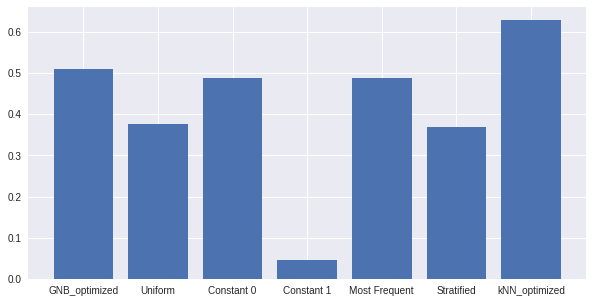

In [0]:
plt.figure(1, figsize=(10, 5))
plt.bar(range(len(f1_macro_opt)), list(f1_macro_opt.values()), align='center')
plt.xticks(range(len(f1_macro_opt)), list(f1_macro_opt.keys()))
plt.show()

In [0]:
for header in metavoli.keys():
  print(header, metavoli[header])

GNB 0.8844263553985563
Uniform 0.004299229544804939
Constant 0 -0.46475141761934546
Constant 1 -0.0021434339619543705
Most Frequent -0.46475141761934546
Stratified -0.5402974701814941
kNN 0.07693047953844345


## Σχολιασμός

Όπως φαίνεται και από το παραπάνω διάγραμμα, το βέλτιστο kNN βελτίωσε αισθητά το f1_macro.

Από σύμπτωση, το βέλτιστο knn μοιάζει να είναι αρκετά κοντά στο default στο οποίο κάναμε τυχαίες αρχικοποιήσεις.



##Multi Layer Perceptron

##f1 micro average

In [0]:
#Δοκιμάσαμε κάθε εφικτό συνδυασμό για την αρχιτεκτονική. Χρειαστήκαμε και αρκετό trial and error για να βρούμε καλά εύρη και διαβαθμίσεις
#Τα αποτελέσματα βρίσκονται στο markdown που ακολουθεί

mlp = MLPClassifier()

n_components = [5,9]
vthreshold = [0,100,1000,3000]
scaler = StandardScaler()
ros = RandomOverSampler()

sizes = [5,10,15]
activ = ['identity','logistic','relu']
alpha = [0.0005, 0.001, 0.005]
learn_rate = ['constant','adaptive']
itera = [200,250,300]
solv = ['lbfgs','adam']

pipe = Pipeline(steps=[('selector', selector),('scaler', scaler),('sampler', ros), ('pca', pca), ('mlp', mlp)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, mlp__hidden_layer_sizes=sizes, mlp__activation=activ,mlp__alpha=alpha, mlp__learning_rate=learn_rate, mlp__max_iter=itera, mlp__solver=solv), cv=5, scoring='f1_micro', n_jobs=-1)

import time
start_time = time.time()
estimator.fit(strain, strain_labels)
preds = estimator.predict(stest)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(stest_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Συνολικός χρόνος fit και predict: 637.5502045154572 seconds
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       289
           1       0.00      0.00      0.00        11

   micro avg       0.88      0.88      0.88       300
   macro avg       0.48      0.46      0.47       300
weighted avg       0.92      0.88      0.90       300

Best score:  0.8969957081545065
Best estimator:  Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=100)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_compone...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
Best parameters:  {'mlp__activation': 'logistic', 'mlp__alpha': 0.0005, 'mlp__hidden_layer_sizes': 15, 'mlp__learning_rate': 'const

###Στάδια:
1. MLP Classifier

###Επίδοση, βέλτιστη παράμετρος:
Best f1_micro score is  0.949928469241774

Optimized params are: 

>activation = logistic

>alpha = 0.0005

>hidden layer size = 5

>learning rate = constant

>maximum iterations = 200

>solver = lbfgs

---
###Στάδια: 
1.  Variance Threshold
2. MLP Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.9527896995708155

Optimized params are: 

>threshold = 0

>activation = logistic

>alpha = 0.0005

>hidden layer size = 5

>learning rate = adaptive

>maximum iterations = 200

>solver = adam
---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. MLP Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.9541423054353536

Optimized params are: 

>threshold = 100

>activation = logistic

>alpha = 0.0005

>hidden layer size = 10

>learning rate = constant

>maximum iterations = 200

>solver = lbfgs

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is 0.9213161659513591

Optimized params are: 

>threshold = 1000

>activation = logistic

>alpha = 0.0005

>hidden layer size = 10

>learning rate = adaptive

>maximum iterations = 200

>solver = adam

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
4. PCA
3. MLP Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.8969957081545065

Optimized params are: 

>threshold = 100

>n_componenents = 9

>activation = logistic

>alpha = 0.0005

>hidden layer size = 15

>learning rate = constant

>maximum iterations = 300

>solver = lbfgs

---

---
---
###Θα χρησιμοποιήσουμε τώρα Min-max Scaler αντί για Standard Scaler

###Στάδια:
1. MinMax Scaler
2. MLP Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is **0.9542203147353362**

Optimized params are: 

>activation = logistic

>alpha = 0.005

>hidden layer size = 5

>learning rate = constant

>maximum iterations = 200

>solver = adam

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
2. MLP Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.9542203147353362

Optimized params are: 


>threshold = 0

>activation = logistic

>alpha = 0.005

>hidden layer size = 5

>learning rate = constant

>maximum iterations = 200

>solver = adam

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
2. MLP Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is 0.8025751072961373

Optimized params are:

>threshold = 0

>activation = logistic

>alpha = 0.001

>hidden layer size = 10

>learning rate = adaptive

>maximum iterations = 200

>solver = adam

---

###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
4. PCA
2. MLP Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is 0.8097281831187411

Optimized params are: 

>threshold = 0

>n_componenents = 5

>activation = logistic

>alpha = 0.005

>hidden layer size = 5

>learning rate = constant

>maximum iterations = 200

>solver = adam

---
---

In [0]:
#Optimized f1_micro

sizes = [4,5,6]
activ = ['logistic']
alpha = [0.003, 0.005, 0.008]
learn_rate = ['constant']
itera = [180,200,220]
solv = ['adam']

pipe = Pipeline(steps=[('scaler', scaler), ('mlp', mlp)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(mlp__hidden_layer_sizes=sizes, mlp__activation=activ,mlp__alpha=alpha, mlp__learning_rate=learn_rate, mlp__max_iter=itera, mlp__solver=solv), cv=5, scoring='f1_micro', n_jobs=-1)


import time
start_time = time.time()
estimator.fit(strain, strain_labels)
preds = estimator.predict(stest)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(stest_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

Συνολικός χρόνος fit και predict: 32.82880878448486 seconds
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       289
           1       0.00      0.00      0.00        11

   micro avg       0.96      0.96      0.96       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.93      0.96      0.95       300

Best score:  0.9470672389127325
Best estimator:  Pipeline(memory='tmp',
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='logistic', alpha=0.003, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
Best parameters:  {'mlp__activation': 'logistic', 'mlp__alpha': 0.003, 'mlp__hidden_layer_sizes': 4, 'mlp__learning_rate': 'constan

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (220) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Fit and transform on the whole dataset

sizes = [4]
activ = ['logistic']
alpha = [0.003]
learn_rate = ['constant']
itera = [220]
solv = ['adam']

pipe = Pipeline(steps=[('scaler', scaler), ('mlp', mlp)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(mlp__hidden_layer_sizes=sizes, mlp__activation=activ,mlp__alpha=alpha, mlp__learning_rate=learn_rate, mlp__max_iter=itera, mlp__solver=solv), cv=5, scoring='f1_micro', n_jobs=-1)


import time
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
end_time=time.time()
print(classification_report(test_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

Συνολικός χρόνος fit και predict: 15.848507642745972 seconds
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     12405
           1       0.00      0.00      0.00       617

   micro avg       0.95      0.95      0.95     13022
   macro avg       0.48      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Best score:  0.9514860283711286
Best estimator:  Pipeline(memory='tmp',
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='logistic', alpha=0.003, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
Best parameters:  {'mlp__activation': 'logistic', 'mlp__alpha': 0.003, 'mlp__hidden_layer_sizes': 4, 'mlp__learning_rate': 'consta

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
times_micro["Optimized MLP"] = end_time-start_time
print("Συνολικός χρόνος fit και predict: %s seconds\n" %(end_time-start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)

print("\n Optimized MLP:")
print(confusion_matrix(test_labels, preds))
print(classification_report(test_labels, preds))

f1_micro_opt["MLP_optimized"] = f1_score(test_labels, preds, average = 'micro')

f1_micro_opt["MLP_optimized"] = f1_score(test_labels, preds, average = 'micro')
metavoli['MLP'] = f1_micro_opt['MLP_optimized'] - f1_micro['MLP_default']

Συνολικός χρόνος fit και predict: 15.8494713306427 seconds

Pipeline(memory='tmp',
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='logistic', alpha=0.003, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
{'mlp__activation': 'logistic', 'mlp__alpha': 0.003, 'mlp__hidden_layer_sizes': 4, 'mlp__learning_rate': 'constant', 'mlp__max_iter': 220, 'mlp__solver': 'adam'}

 Optimized MLP:
[[12405     0]
 [  617     0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     12405
           1       0.00      0.00      0.00       617

   micro avg       0.95      0.95      0.95     13022
   macro avg       0.48      0.50      0.49     13022
weighted avg       0.91  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


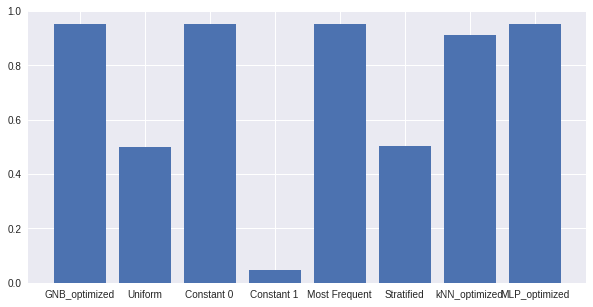

In [0]:
plt.figure(1, figsize=(10, 5))
plt.bar(range(len(f1_micro_opt)), list(f1_micro_opt.values()), align='center')
plt.xticks(range(len(f1_micro_opt)), list(f1_micro_opt.keys()))
plt.show()

In [0]:
for header in metavoli.keys():
  print(header, metavoli[header])

GNB 0.8844263553985563
Uniform 0.004299229544804939
Constant 0 -0.46475141761934546
Constant 1 -0.0021434339619543705
Most Frequent -0.46475141761934546
Stratified -0.5402974701814941
kNN 0.07693047953844345
MLP 0.04630625095991403


## Σχολιασμός

Παρατηρούμε πως με το βέλτιστο MLP ξεπεράσαμε κάθε άλλο μοντέλο. Τη μέγιστη μεταβολή στην επίδοση είχε ο GNB



##f1 macro average

In [0]:
#Δοκιμάσαμε κάθε εφικτό συνδυασμό για την αρχιτεκτονική. Χρειαστήκαμε και αρκετό trial and error για να βρούμε καλά εύρη και διαβαθμίσεις
#Τα αποτελέσματα βρίσκονται στο markdown που ακολουθεί

mlp = MLPClassifier()

n_components = [5,9]
vthreshold = [0,0.0002,0.0005]
scaler = MinMaxScaler()
ros = RandomOverSampler()

sizes = [5,10,15]
activ = ['logistic','relu']
alpha = [0.001, 0.005]
learn_rate = ['constant','adaptive']
itera = [200,250,300]
solv = ['lbfgs','adam']

pipe = Pipeline(steps=[('scaler', scaler), ('selector', selector),('sampler', ros), ('pca', pca),('mlp', mlp)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,mlp__hidden_layer_sizes=sizes, mlp__activation=activ,mlp__alpha=alpha, mlp__learning_rate=learn_rate, mlp__max_iter=itera, mlp__solver=solv), cv=5, scoring='f1_macro', n_jobs=-1)


import time
start_time = time.time()
estimator.fit(strain, strain_labels)
preds = estimator.predict(stest)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(stest_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Συνολικός χρόνος fit και predict: 173.6690912246704 seconds
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       289
           1       0.06      0.36      0.11        11

   micro avg       0.78      0.78      0.78       300
   macro avg       0.52      0.58      0.49       300
weighted avg       0.94      0.78      0.84       300

Best score:  0.5324560604576718
Best estimator:  Pipeline(memory='tmp',
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=0.0005)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=9, r...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
Best parameters:  {'mlp__activation': 'logistic', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': 10, 'mlp__learning_rate': 'consta

###Στάδια:
1. MLP Classifier

###Επίδοση, βέλτιστη παράμετρος:
Best f1_macro score is  0.556411203114356

Optimized params are: 

>activation = relu

>alpha = 0.01

>hidden layer size = 15

>learning rate = adaptive

>maximum iterations = 200

>solver = lbfgs

---
###Στάδια: 
1.  Variance Threshold
2. MLP Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.5756587816305031

Optimized params are: 

>threshold = 0

>activation = relu

>alpha = 0.005

>hidden layer size = 10

>learning rate = adaptive

>maximum iterations = 300

>solver = adam
---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. MLP Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is **0.5833782068322692**

Optimized params are: 

>threshold = 0

>activation = logistic

>alpha = 0.001

>hidden layer size = 5

>learning rate = adaptive

>maximum iterations = 300

>solver = lbfgs

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is 0.5165911982231136

Optimized params are: 

>threshold = 1000

>activation = logistic

>alpha = 0.001

>hidden layer size = 5

>learning rate = constant

>maximum iterations = 200

>solver = adam

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
4. PCA
3. MLP Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.52398813560042

Optimized params are: 

>threshold = 0

>n_componenents = 9

>activation = logistic

>alpha = 0.005

>hidden layer size = 5

>learning rate = adaptive

>maximum iterations = 300

>solver = lbfgs

---

---
---
###Θα χρησιμοποιήσουμε τώρα Min-max Scaler αντί για Standard Scaler

###Στάδια:
1. MinMax Scaler
2. MLP Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is 0.5673125989670121

Optimized params are: 

>activation = logistic

>alpha = 0.005

>hidden layer size = 10

>learning rate = adaptive

>maximum iterations = 200

>solver = lbfgs

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
2. MLP Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is 0.5673125989670121

Optimized params are: 

>threshold = 0

>activation = logistic

>alpha = 0.005

>hidden layer size = 10

>learning rate = adaptive

>maximum iterations = 200

>solver = lbfgs

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
2. MLP Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is 0.5144931233141627

Optimized params are:

>threshold = 0

>activation = relu

>alpha = 0.001

>hidden layer size = 5

>learning rate = adaptive

>maximum iterations = 300

>solver = adam

---

###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
4. PCA
2. MLP Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is 0.5324560604576718

Optimized params are: 

>threshold = 0.0005

>n_componenents = 9

>activation = logistic

>alpha = 0.001

>hidden layer size = 10

>learning rate = constant

>maximum iterations = 300

>solver = lbfgs

---
---

In [0]:
#Optimized macro
mlp = MLPClassifier()

vthreshold = [0,10,50]
scaler = StandardScaler()
ros = RandomOverSampler()

sizes = [4,5,6]
activ = ['logistic']
alpha = [0.0005, 0.001, 0.002]
learn_rate = ['adaptive']
itera = [270,300,350]
solv = ['lbfgs']

pipe = Pipeline(steps=[('selector', selector),('scaler', scaler), ('mlp', mlp)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold,mlp__hidden_layer_sizes=sizes, mlp__activation=activ,mlp__alpha=alpha, mlp__learning_rate=learn_rate, mlp__max_iter=itera, mlp__solver=solv), cv=5, scoring='f1_macro', n_jobs=-1)


import time
start_time = time.time()
estimator.fit(strain, strain_labels)
preds = estimator.predict(stest)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(stest_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Συνολικός χρόνος fit και predict: 58.473142862319946 seconds
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       289
           1       0.12      0.18      0.14        11

   micro avg       0.92      0.92      0.92       300
   macro avg       0.54      0.56      0.55       300
weighted avg       0.94      0.92      0.93       300

Best score:  0.6126160024746692
Best estimator:  Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='logistic', alpha=0.002, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, l...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
Best parameters:  {'mlp__activation': 'logistic', 'mlp__alpha': 0.002, 'mlp__hidden_layer_sizes': 4, 'mlp__learning_rate': 'adapti

In [0]:
#Fit and transform whole dataset

mlp = MLPClassifier()

vthreshold = [0]
scaler = StandardScaler()
ros = RandomOverSampler()

sizes = [4]
activ = ['logistic']
alpha = [0.002]
learn_rate = ['adaptive']
itera = [300]
solv = ['lbfgs']

pipe = Pipeline(steps=[('selector', selector),('scaler', scaler), ('mlp', mlp)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold,mlp__hidden_layer_sizes=sizes, mlp__activation=activ,mlp__alpha=alpha, mlp__learning_rate=learn_rate, mlp__max_iter=itera, mlp__solver=solv), cv=5, scoring='f1_macro', n_jobs=-1)


import time
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(test_labels, preds))

print('Best score: ', estimator.best_score_)
print('Best estimator: ', estimator.best_estimator_)
print('Best parameters: ', estimator.best_params_)

Συνολικός χρόνος fit και predict: 31.82580041885376 seconds
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12405
           1       0.65      0.22      0.33       617

   micro avg       0.96      0.96      0.96     13022
   macro avg       0.81      0.61      0.66     13022
weighted avg       0.95      0.96      0.95     13022

Best score:  0.61495363458022
Best estimator:  Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='logistic', alpha=0.002, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, l...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
Best parameters:  {'mlp__activation': 'logistic', 'mlp__alpha': 0.002, 'mlp__hidden_layer_sizes': 4, 'mlp__learning_rate': 'adaptive'

In [0]:
#times_macro["Optimized MLP"] = end_time-start_time
print("Συνολικός χρόνος fit και predict: %s seconds\n" %(end_time-start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)

print("\n Optimized MLP:")
print(confusion_matrix(test_labels, preds))
print(classification_report(test_labels, preds))

f1_macro_opt["MLP_optimized"] = f1_score(test_labels, preds, average = 'macro')

f1_macro_opt["MLP_optimized"] = f1_score(test_labels, preds, average = 'macro')
metavoli['MLP'] = f1_macro_opt['MLP_optimized'] - f1_macro['MLP_default']

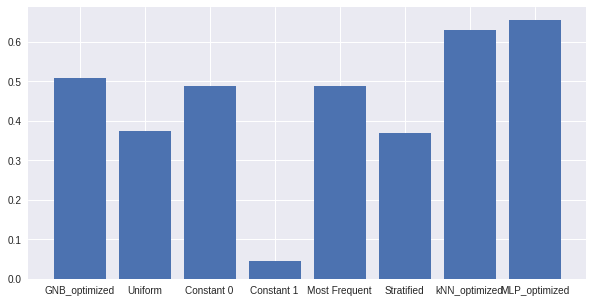

In [0]:
plt.figure(1, figsize=(10, 5))
plt.bar(range(len(f1_macro_opt)), list(f1_macro_opt.values()), align='center')
plt.xticks(range(len(f1_macro_opt)), list(f1_macro_opt.keys()))
plt.show()

In [0]:
for header in metavoli.keys():
  print(header, metavoli[header])

GNB 0.8844263553985563
Uniform 0.004299229544804939
Constant 0 -0.46475141761934546
Constant 1 -0.0021434339619543705
Most Frequent -0.46475141761934546
Stratified -0.5402974701814941
kNN 0.07693047953844345
MLP 0.05816782707827017


## Σχολιασμός

Βλέπουμε πως το MLP απέδωσε καλύτερα από τα υπόλοιπα μοντέλα και στο f1_macro. Και πάλι, τη σημαντικότερη βελτίωση είχε ο GNB

Συμπεραίνουμε πως για το συγκεκριμένο dataset, το MLP (με την αρχιτεκτονική pipeline που αναλύθηκε), είναι μάλλον ο καλύτερος ταξινομητής από αυτούς που έχουμε στη διάθεσή μας, αλλά λόγω του μεγαλύτερου αριθμού προς βελτιστοποίηση είναι ο πιο χρονοβόρος.

*(Δε θα μπορούσαμε να συγκρίνουμε χρόνους καθώς το optimized grid search δεν έγινε σε όλο το dataset αλλά σε τυχαίο δείγμα. Πάντως, από τους χρόνους που εξάγαμε από το Grid Search στα τυχαία δείγματα είναι χωρίς αμφιβολία ο MLP.)*

